# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Syelvia Julianti
- **Email:** syelviajul678@gmail.com
- **ID Dicoding:** syelvia_06 (m014b4kx4269)

## Menentukan Pertanyaan Bisnis

- Which city has the highest number of purchases based on total orders?  
-
In the city with the highest orders, which product has sold the most and the least based on total orders?

## Import Semua Packages/Library yang Digunakan

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

The data used in this research is from a public e-commerce dataset. There are five tables being utilized, namely `order_items_dataset.csv`, `products_dataset.csv`, `product_category_name_translation.csv`, `orders_dataset.csv`, and `customers_dataset.csv`.





### Gathering Data

This stage is used to gather all the necessary data by loading the data.


*   
Loading the order items table (order_items_dataset.csv)



In [292]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/syelvia/submission/main/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The table above displays the top 5 rows of the data, which include the columns order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, and freight_value.

*   
Loading the products table (products_dataset.csv)



In [293]:
products_df = pd.read_csv("https://raw.githubusercontent.com/syelvia/submission/main/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


The table above displays the top 5 rows of the data, which include the columns product_id, product_category_name,product_name_lenght,product_description_lenght,product_photos_qty, product_weight_g, product_length_cm, product_height_cm, and product_width_cm.

*   
Loading the product category translation table (product_category_name_translation.csv)



In [294]:
products_category_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/syelvia/submission/main/data/product_category_name_translation.csv")
products_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


The table above displays the top 5 rows of the data, which include the columns product_category_name and product_category_name_english.

*   
Loading the orders table (orders_dataset.csv)



In [295]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/syelvia/submission/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



The table above displays the top 5 rows of the data, which include the columns order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date.

*   
Loading the customers table (customer_dataset.csv)



In [296]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/syelvia/submission/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



The table above displays the top 5 rows of the data, which include the columns customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, and customer_state.

**Insight:**
- `order_items_dataset.csv`: Contains details of each item within an order.
- `products_dataset.csv`: Contains detailed information about the products.
- `product_category_name_translation.csv`: Contains translations of product categories from Portuguese to English.
- `orders_dataset.csv`: Contains information on orders placed by customers.
- `customers_dataset.csv`: Contains information about the customers.

### Assessing Data

This stage aims to assess the quality of the data and identify issues that need to be addressed before it can be used.





*   Assessing order_items_df.




In [297]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


The stage above is used to check the data types, where it can be observed that there is a data type error in the `shipping_limit_date` column, which should be represented as a datetime type. From the results above, it is known that there are no missing values as the data count is consistent.

In [298]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


From the results above, it is known that there are no duplicate data entries.

In [299]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000



From the results above, it can be seen that there are no anomalies in the summary of statistical parameters.



*   Assessing products_df



In [300]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


There are no issues with the data types, but there are missing values in the columns `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, and `product_width_cm`.

In [301]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2



It is known that the number of missing values is as follows: 610 in the `product_category_name` column, 610 in `product_name_lenght`, 610 in `product_description_lenght`, 610 in `product_photos_qty`, 2 in `product_weight_g`, 2 in `product_length_cm`, 2 in `product_height_cm`, and 2 in `product_width_cm`.

In [302]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


There are no duplicated data entries.

In [303]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000



There is an anomaly in the minimum value of the `product_weight_g` column, which is 0.



*   
Assessing product_category_name_translation_df



In [304]:
products_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


There are no data type errors and no missing values.

In [305]:
print("Jumlah duplikasi: ", products_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


There are no duplicated data entries.

In [306]:
products_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1



There are no anomalies in the summary of statistical parameters.



*   Assessing orders_df



In [307]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB



There are data type errors in the columns `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date`, which should be represented as datetime data types and there are missing values in the columns `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date`.

In [308]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0



There are missing values as follows: 160 in the `order_approved_at` column, 1,783 in `order_delivered_carrier_date`, and 2,965 in `order_delivered_customer_date`.

In [309]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


There are no duplicated data entries.

In [310]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


There are no anomalies in the summary of statistical parameters.



*   
Assessing customers_df



In [311]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


There are no data type errors and no missing values.

In [312]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


There are no duplicated data entries.

In [313]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


There are no anomalies in the summary of statistical parameters.

**Insight:**
- `order_items_df`: There is a data type error in the `shipping_limit_date` column, which should be represented as a datetime data type.
- `products_df`: There are missing values in the columns `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, and `product_width_cm`. There is also an anomaly in the minimum value of the `product_weight_g` column, which is 0.
- `orders_df`: There is a data type error in the columns `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date`, which should be represented as datetime data types and there are missing values in the columns `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date`.

### Cleaning Data

This stage will address the issues that were identified during the data assessment stage.

*   
Cleaning the order_items_df data.

> Changing the data type of the shipping_limit_date column.



In [314]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Changing the data type of the `shipping_limit_date` column to datetime.



*   
Cleaning the products_df data

> Handling missing values in the columns product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, and product_width_cm.







In [315]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0



These columns should be deleted because most of their contents are empty (NaN), making them uninformative for analysis. Therefore, to address this issue, the dropping method will be used.

In [316]:
products_df.dropna(inplace=True)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0



The dropping method involves deleting rows with NaN values to ensure there are no more missing values.




> Handling inaccurate values in the product_weight_g column.



In [317]:
products_df[products_df.product_weight_g == products_df.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


The first step is to look at the rows of data that contain inaccurate values. It is known that the column product_weight_g with a value of 0 belongs to products in the category cama_mesa_banho. Therefore, it will be replaced with the average value of product_weight_g for the product category cama_mesa_banho

In [318]:
average_weight = products_df.loc[(products_df['product_category_name'] == 'cama_mesa_banho') & (products_df['product_weight_g'] != 0), 'product_weight_g'].mean()
average_weight

2459.653223140496

The code above is used to find the average value of products in the cama_mesa_banho category, resulting in an average value of 2459. Therefore, the product_weight_g column, which previously had a value of 0, will be replaced with 2459.

In [319]:
products_df['product_weight_g'].replace(0, 2459, inplace=True)

<ipython-input-319-58ec2fba063e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_weight_g'].replace(0, 2459, inplace=True)


Changing the product_weight_g column that previously had a value of 0 to 2459 using replace.

In [320]:
products_df[products_df.product_weight_g == products_df.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9396,ad7d07f5775feab3f20504d1ad3fff11,moveis_decoracao,50.0,1002.0,2.0,2.0,11.0,11.0,52.0
13397,7ddb76f2c7237acc852358b95e7946a8,papelaria,49.0,1048.0,2.0,2.0,11.0,11.0,52.0
15374,f9fafac43d3416d92ecc303fdeb1743d,moveis_decoracao,51.0,1039.0,2.0,2.0,11.0,11.0,52.0
15675,8aae4df46baf1278422b69edbb50bd35,moveis_decoracao,56.0,1002.0,2.0,2.0,11.0,11.0,52.0
16181,5837bba0ce6e35e6f2dc5c3e223e3276,moveis_decoracao,52.0,1041.0,2.0,2.0,11.0,11.0,52.0


In [321]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2277.260730,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.217385,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Upon examination, it can be seen that the minimum value of the product_weight_g column is 2.0, no longer 0

*   Cleaning the orders_df data
> Changing the data types of the columns order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date.





In [322]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB




> Handling missing values in the columns order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date.



In [323]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


No need to handle the missing values because these columns are empty when the status is "cancel," so it is expected for these columns to remain empty.

**Insight:**
- `order_items_df`: Change the data type of the shipping_limit_date column to datetime.
- `products_df`: Remove missing values by deleting rows with NaN values to ensure there are no more missing entries. Additionally, replace the smallest value in the product_weight_g column, which was previously 0, with the calculated average weight.
- `orders_df`: Convert the data types of the columns order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date to datetime. There is no need to address missing values in these columns, as they are intended to be empty when the order status is canceled.


## Exploratory Data Analysis (EDA)

This stage will conduct data exploration to answer the two predefined business questions.

### Explore ...



*   
Exploration of customer_df data



The dataset contains various information related to customers: customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state.

In [324]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Customer_city has 4,119 unique cities, with Sao Paulo being the city with the most customers, totaling 15,540 unique customers, which can help analyze the cities with the highest purchases based on total orders.



*  
Exploration of order_items_df data



In [325]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Based on the summary of statistical parameters above, it is found that a total of 32,951 products were sold, with an average of 1.2 items per order and a maximum of 21 items, indicating that most customers purchase only a few items per transaction.



*   Products_df data exploration


In [326]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2277.260730,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.217385,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Based on the summary of statistical parameters above, it was found that there are 73 product categories, with the best-selling product being "cama_mesa_banho," which translates to "bed_bath_table" in English.



*   Exploration of the orders_df and customers_df



In [327]:
orders_customers_df = pd.merge(
    left=orders_df[['order_id', 'customer_id', 'order_status']],
    right=customers_df[['customer_id', 'customer_city', 'customer_state']],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

orders_customers_df.head()

,order_id,customer_id,order_status,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,santo andre,SP


Merging the orders_df and customers_df tables using a left join on customer_id to obtain information about the city of origin for each order placed by customers and to count the total number of orders placed by each customer.

In [328]:
city_order_counts = orders_customers_df.groupby("customer_city")['order_id'].nunique().sort_values(ascending=False).reset_index()
city_order_counts.columns = ['City', 'Total Orders']
city_order_counts.head(10)

,City,Total Orders
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938



From the code above, it can be determined that the top 9 cities with the highest number of orders have been identified, with São Paulo being the city with the most orders.



*   Exploration of the orders_df, customers_df, order_items_df, and products_translated_df data.


In [329]:
products_translated_df = pd.merge(
    left=products_df,
    right=products_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name",
    suffixes=('', '_translation')
)
products_translated_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Merging products_df with product_category_name_translation_df using a left join to obtain the product names in English, while adding a suffix to ensure there are no duplicate columns.

In [330]:
products_translated_df.drop('product_category_name', axis=1, inplace=True)
products_translated_df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

products_translated_df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Removing the product_category_name column in the original language and retaining only the category name in English, renaming the product_category_name_english column to product_category_name, resulting in the product categories being in English.

In [331]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df[['customer_id', 'customer_city']],
    how="left",
    on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,barreiras
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,vianopolis
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,santo andre


Merging orders_df with customers_df using a left join to obtain information about the city.

In [332]:
merged_orders_items_df = pd.merge(
    left=orders_customers_df,
    right=order_items_df[['order_id', 'product_id', 'order_item_id']],
    how="left",
    on="order_id"
)
merged_orders_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,product_id,order_item_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,87285b34884572647811a353c7ac498a,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,barreiras,595fac2a385ac33a80bd5114aec74eb8,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,vianopolis,aa4383b373c6aca5d8797843e5594415,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante,d0b61bfb1de832b15ba9d266ca96e5b0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,santo andre,65266b2da20d04dbe00c5c2d3bb7859e,1.0



Merging orders_customers_df with order_items_df using a left join to obtain information about the products in each order.

In [333]:
full_data_df = pd.merge(
    left=merged_orders_items_df,
    right=products_translated_df[['product_id', 'product_category_name']],
    how="left",
    on="product_id"
)

full_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,product_id,order_item_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,87285b34884572647811a353c7ac498a,1.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,barreiras,595fac2a385ac33a80bd5114aec74eb8,1.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,vianopolis,aa4383b373c6aca5d8797843e5594415,1.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante,d0b61bfb1de832b15ba9d266ca96e5b0,1.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,santo andre,65266b2da20d04dbe00c5c2d3bb7859e,1.0,stationery


Merging the result from merged_orders_items_df with products_translated_df to obtain the product category for each item ordered in every order.

In [334]:
city_order_counts = full_data_df.groupby('customer_city')['order_id'].nunique().reset_index()
city_order_counts.columns = ['City', 'Total Orders']
city_order_counts.head()

,City,Total Orders
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2



The code is used to count the unique orders (order_id) in each city (customer_city), store the results in the city_order_counts dataframe, rename the columns to City and Total Orders, and then display the first 5 rows of the results.

In [335]:
top_city = city_order_counts.sort_values(by='Total Orders', ascending=False).iloc[0]
top_city_name = top_city['City']
top_city_orders = top_city['Total Orders']

top_city_name, top_city_orders

('sao paulo', 15540)

The code above is used to retrieve the city with the highest number of orders (top_city) from the city_order_counts dataframe, storing the name of that city in the variable top_city_name and the total number of orders in the variable top_city_orders, and then displaying both.

In [336]:
top_city_data = full_data_df[full_data_df['customer_city'] == top_city_name]

The code above is used to filter the full_data_df dataset so that it only includes data from the city with the highest total number of orders (top_city_name) and stores it in the top_city_data dataframe.

In [337]:
product_order_counts = (
    top_city_data.groupby('product_category_name')
    .agg(Total_Orders=('order_id', 'nunique'))
    .reset_index()
)

Calculating the total orders for each product category in the city with the highest orders using .agg().

In [338]:
product_order_counts = product_order_counts.sort_values(by='Total_Orders', ascending=False)

top_5_products = product_order_counts.head(5)
display(top_5_products)

bottom_5_products = product_order_counts.tail(5)
display(bottom_5_products)

,product_category_name,Total_Orders
7,bed_bath_table,1653
43,health_beauty,1533
64,sports_leisure,1266
49,housewares,1107
15,computers_accessories,1004


,product_category_name,Total_Orders
11,cds_dvds_musicals,4
55,music,4
32,fashion_sport,4
3,arts_and_craftmanship,2
52,la_cuisine,1


The code above sorts the product_order_counts dataframe by Total_Orders in descending order, then displays the top 5 product categories (top_5_products) and the bottom 5 product categories (bottom_5_products) in separate tables using display().

**Insight:**
- From the customer data, it was found that there are 4,119 unique cities, with São Paulo being the city with the most customers, totaling 15,540 unique customers. This information can help analyze the cities with the highest purchases based on total orders.
- From the order items data, it was found that a total of 32,951 products were sold, with an average of 1.2 items per order and a maximum of 21 items. This indicates that most customers tend to purchase only a few items per transaction.
- The product data revealed that there are 73 product categories, with the best-selling product being "cama_mesa_banho," which translates to "bed_bath_table" in English.
- The merging of the orders and customer data allowed for the calculation of the number of orders based on order_id. It was found that the city with the highest number of orders is São Paulo, with a total of 15,540 orders.
- By merging the orders, customers, order items, and product translation data, insights were gained regarding the products with the highest and lowest purchases based on total orders in the city with the most orders, São Paulo. The product category with the highest orders is bed_bath_table, totaling 1,653 orders, while the category with the lowest purchases is la_cuisine, with a total of 1 order.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Which city has the highest number of purchases based on total orders?

<ipython-input-339-d68b9ec85315>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

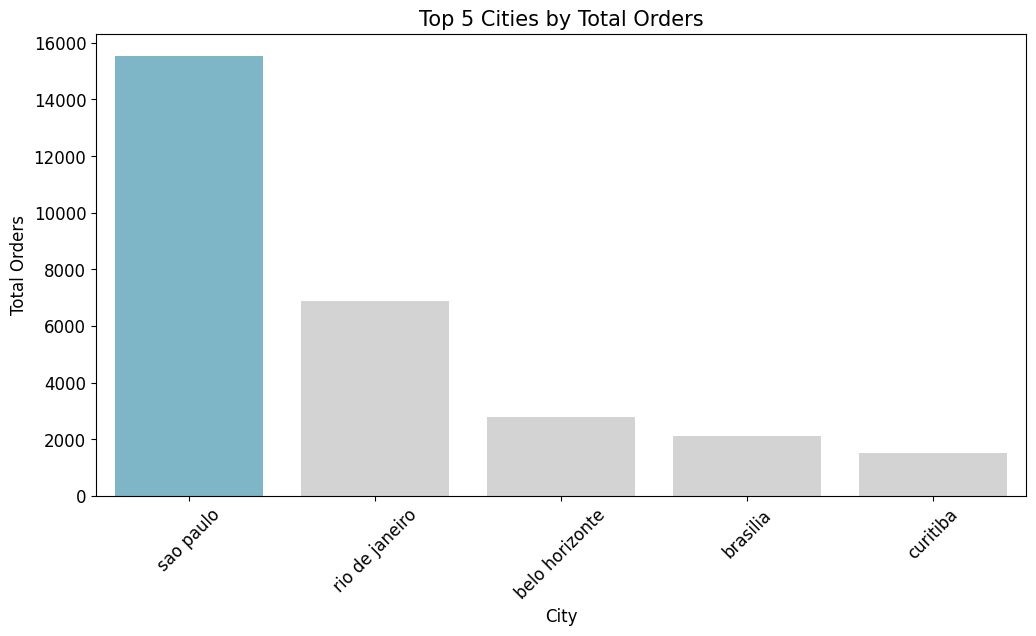

In [339]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(12, 6))

sns.barplot(
    y="Total Orders",
    x="City",
    data=city_order_counts.sort_values(by="Total Orders", ascending=False).head(5),
    palette=colors
)

plt.title("Top 5 Cities by Total Orders", loc="center", fontsize=15)
plt.ylabel("Total Orders", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

The code above is used to create a bar plot displaying the top 5 cities (City) based on the total number of orders (Total Orders) with a custom color palette using Seaborn. It also adds settings for the title, axis labels, and rotates the x-axis labels for better readability.

### Pertanyaan 2: In the city with the highest orders, which product has sold the most and the least based on total orders?

<ipython-input-340-e24c77676d3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

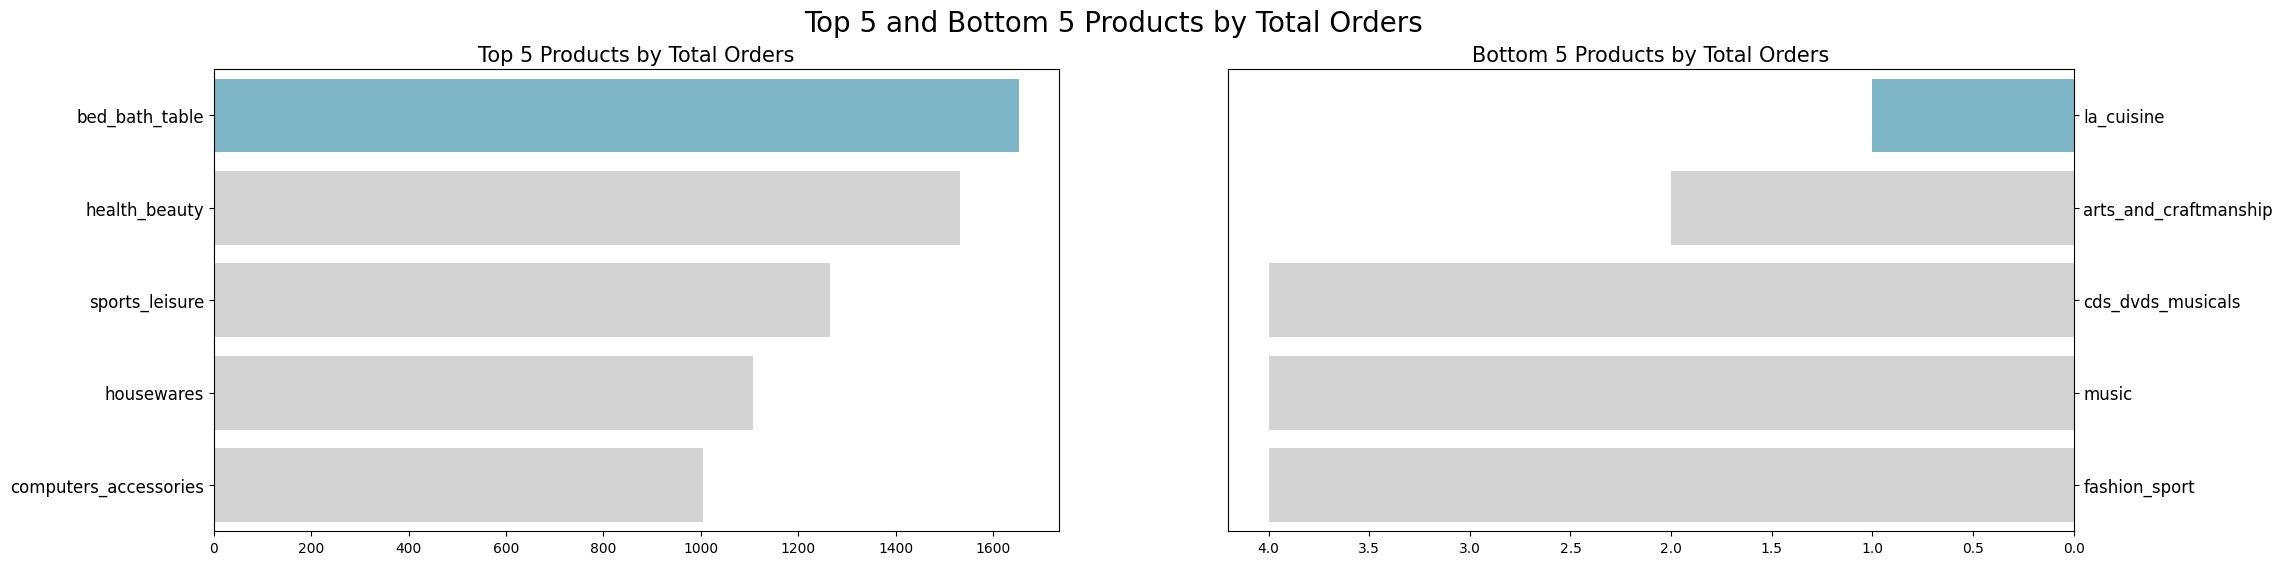

In [340]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(
    x="Total_Orders",
    y="product_category_name",
    data=top_5_products,
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Products by Total Orders", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(
    x="Total_Orders",
    y="product_category_name",
    data=bottom_5_products.sort_values(by="Total_Orders", ascending=True),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom 5 Products by Total Orders", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Top 5 and Bottom 5 Products by Total Orders", fontsize=20)
plt.show()


The code above is used to create two side-by-side bar plots displaying the top 5 product categories (Top 5 Products by Total Orders) on the left plot and the bottom 5 product categories (Bottom 5 Products by Total Orders) on the right plot, based on Total_Orders using Seaborn. It also adds display settings and titles to each plot.

**Insight:**
- Based on the total orders, it can be seen that the city with the highest total orders is Sao Paulo.
- The city with the highest total orders, or the top city, is Sao Paulo, where it is known that the most ordered product is bed_bath_table and the least ordered product is la_cuisine.

## Analisis Lanjutan (Opsional)

In [350]:
orders_price_df = pd.merge(
    orders_customers_df,
    order_items_df[['order_id', 'price']],
    how='left',
    on='order_id'
)

rfm_df = orders_price_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"]).dt.date
recent_date = orders_price_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


The code above merges orders_customers_df with order_items_df to obtain the price column, and then performs RFM (Recency, Frequency, Monetary) analysis based on customer_id to calculate the number of days since the last transaction (recency), the number of unique transactions (frequency), and the total revenue (monetary) from each customer.

<ipython-input-351-214a4a28d158>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packa

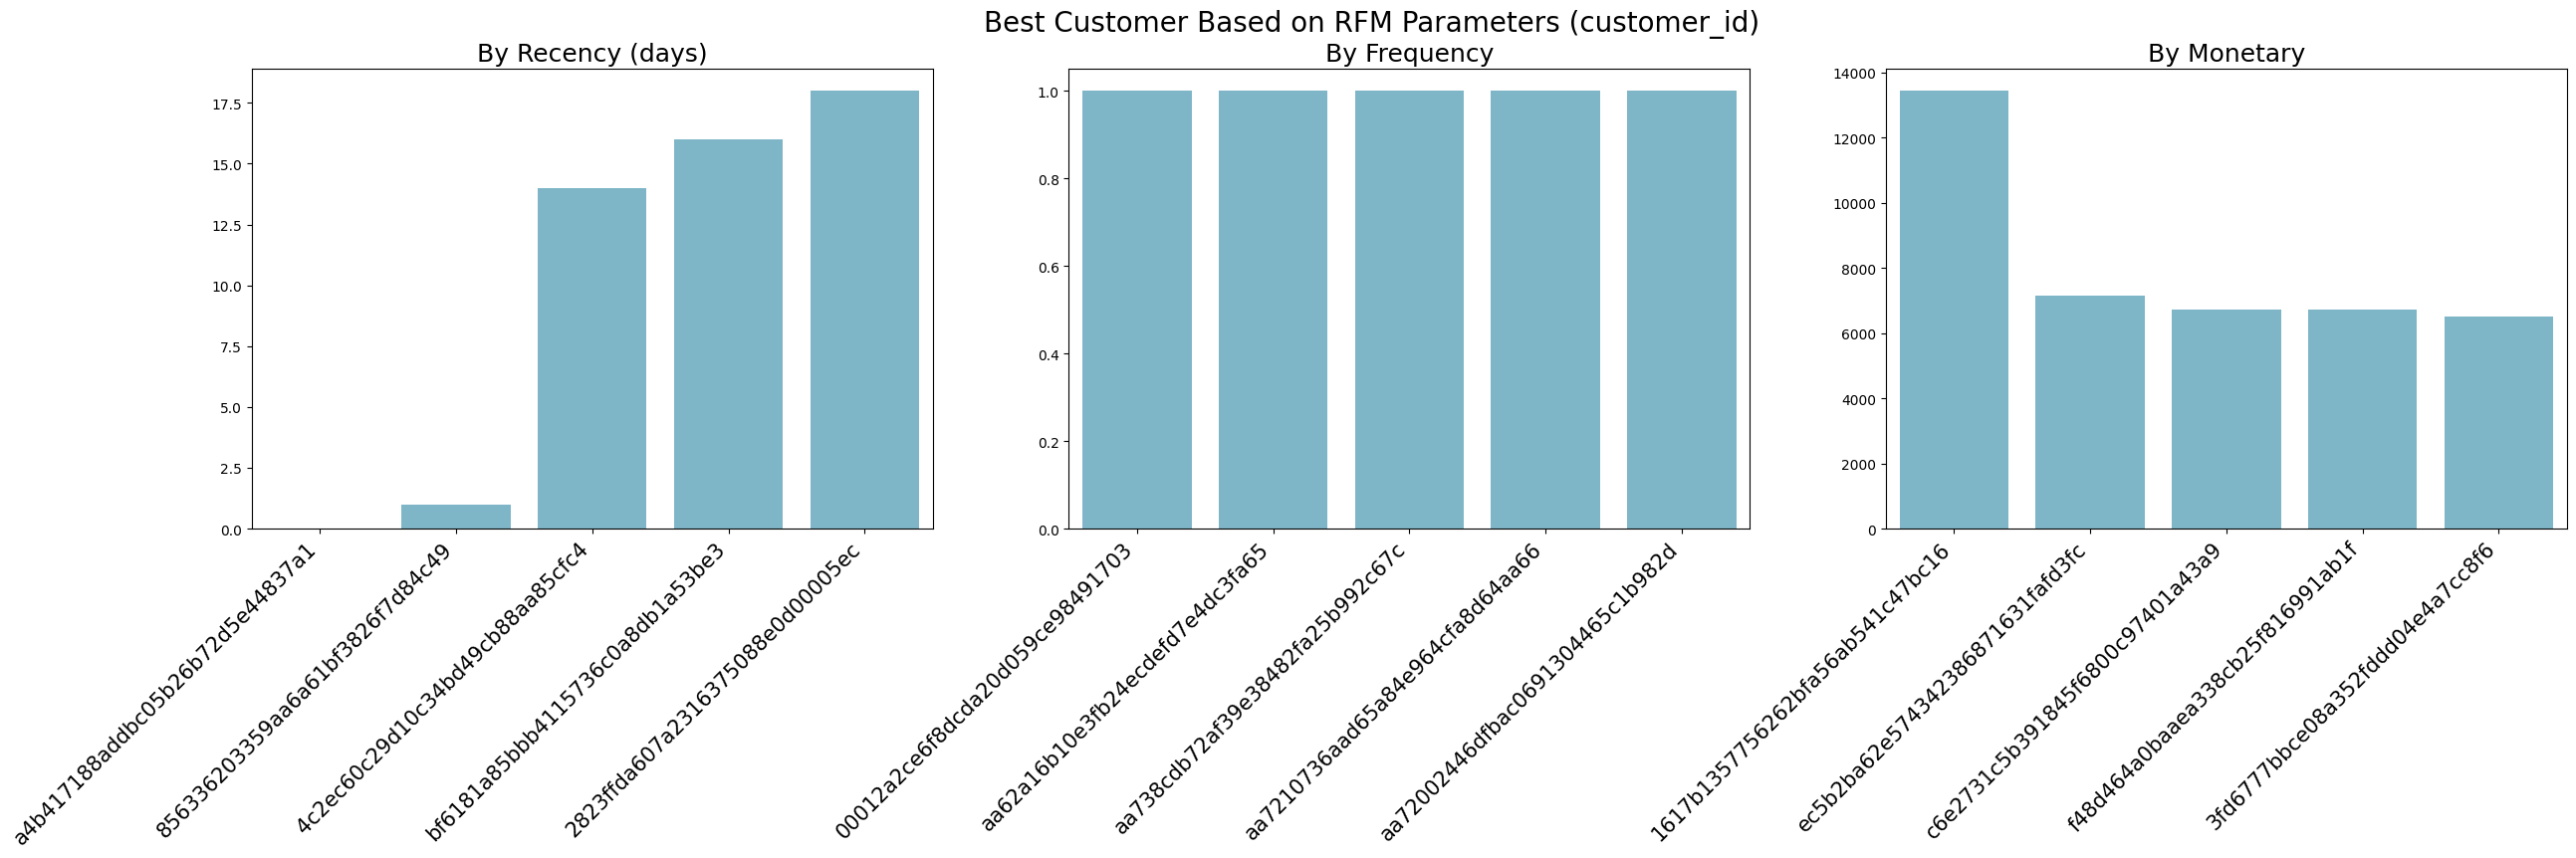

In [351]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Visualisasi berdasarkan Recency (5 pelanggan dengan nilai Recency terendah)
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')  # Rotasi tulisan customer_id agar miring

# Visualisasi berdasarkan Frequency (5 pelanggan dengan nilai Frequency tertinggi)
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')  # Rotasi tulisan customer_id agar miring

# Visualisasi berdasarkan Monetary (5 pelanggan dengan nilai Monetary tertinggi)
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')  # Rotasi tulisan customer_id agar miring

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


The code above creates three bar chart visualizations displaying the top 5 customers based on Recency, Frequency, and Monetary values from the RFM analysis

## Conclusion

- From the question "Which city has the highest number of purchases based on total orders?", it is concluded that the city with the highest total orders is São Paulo, with a total of 15,540 orders. Looking at the top 5 cities after São Paulo, there are Rio de Janeiro with 6,882 total orders, Belo Horizonte with 2,773 total orders, Brasília with 2,773 total orders, and Curitiba with a total of orders for Curitiba.
- From the question "In the city with the highest orders, which product has sold the most and the least based on total orders?", it is concluded that the city with the highest total orders is São Paulo. The product with the highest number of orders is bed_bath_table with a total of 1,653 orders, followed by health_beauty with 1,533, sports_leisure with 1,266, housewares with 1,107, and computers_accessories with 1,004. Meanwhile, the product with the least orders is la_cuisine with a total of 1 order, followed by arts_and_craftsmanship with 2, fashion_sport with 4, music with 4, and cds_dvds_musicals with 4.

In [353]:
all_data_df = pd.merge(
    full_data_df,
    orders_price_df[['order_id', 'price']],
    how='left',
    on='order_id'
)

all_data_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,product_id,order_item_id,product_category_name,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,87285b34884572647811a353c7ac498a,1.0,housewares,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,barreiras,595fac2a385ac33a80bd5114aec74eb8,1.0,perfumery,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,vianopolis,aa4383b373c6aca5d8797843e5594415,1.0,auto,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante,d0b61bfb1de832b15ba9d266ca96e5b0,1.0,pet_shop,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,santo andre,65266b2da20d04dbe00c5c2d3bb7859e,1.0,stationery,19.90


The code above is used to merge full_data_df with orders_price_df based on order_id using a left join, so that all_data_df will contain all information from full_data_df while adding the price column from orders_price_df. This is necessary to consolidate the data for creating a dashboard to address two business questions and perform RFM analysis.

In [354]:
all_data_df.to_csv("all_data.csv", index=False)